# Hash Codes
Consider the challenges associated with the 16-bit hashcode for a character string `s` that sums the Unicode values of the characters in `s`.

For example, let `s = "stop"`. It's unicode character representation is:

In [5]:
for char in "stop":
    print(char + ': ' + str(ord(char)))


s: 115
t: 116
o: 111
p: 112


In [6]:
sum([ord(x) for x in "stop"])

454

If we then sum these unicode values, we arrive as the following hash code:

```
stop -----------> 454
```

The problem is, the following strings will all map to the same value!

```
stop -----------> 454
pots -----------> 454
tops -----------> 454
spot -----------> 454
```

A better hash code would take into account the _position_ of our characters.

## Polynomial Hash code
If we refer to the characters of our string as $x_0, x_1, \dots, x_n$, we can then chose a non-zero constant, $a \neq 1$, and use a hash code:

$$a^{n-1} x_0 + a^{n-2} x_1 + \dots + a^1 x_{n-1} + a^0 x_{n}$$

This is simply a polynomial in $a$ that has our $x_i$ values as it's coefficients. This is known as a **polynomial** hash code.

In [19]:
1 << 32

4294967296

In [21]:
2**32

4294967296

In [26]:
2 << 2

8

## Investigate hash map uniformity

In [3]:
import random

import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [43]:
n = 0
prime = 109345121
scale = 1 + random.randrange(prime - 1)
shift = random.randrange(prime)

In [44]:
def my_hash_func(k, upper):
    table = upper * [None]
    

    
    hash_code = hash(k)
    
    compressed_code = (hash_code * scale + shift) % prime % len(table)
    return compressed_code

In [48]:

upper = 1000
inputs = list(range(0, upper))
hash_results = []
for i in inputs:
    hash_results.append(my_hash_func(i, upper))

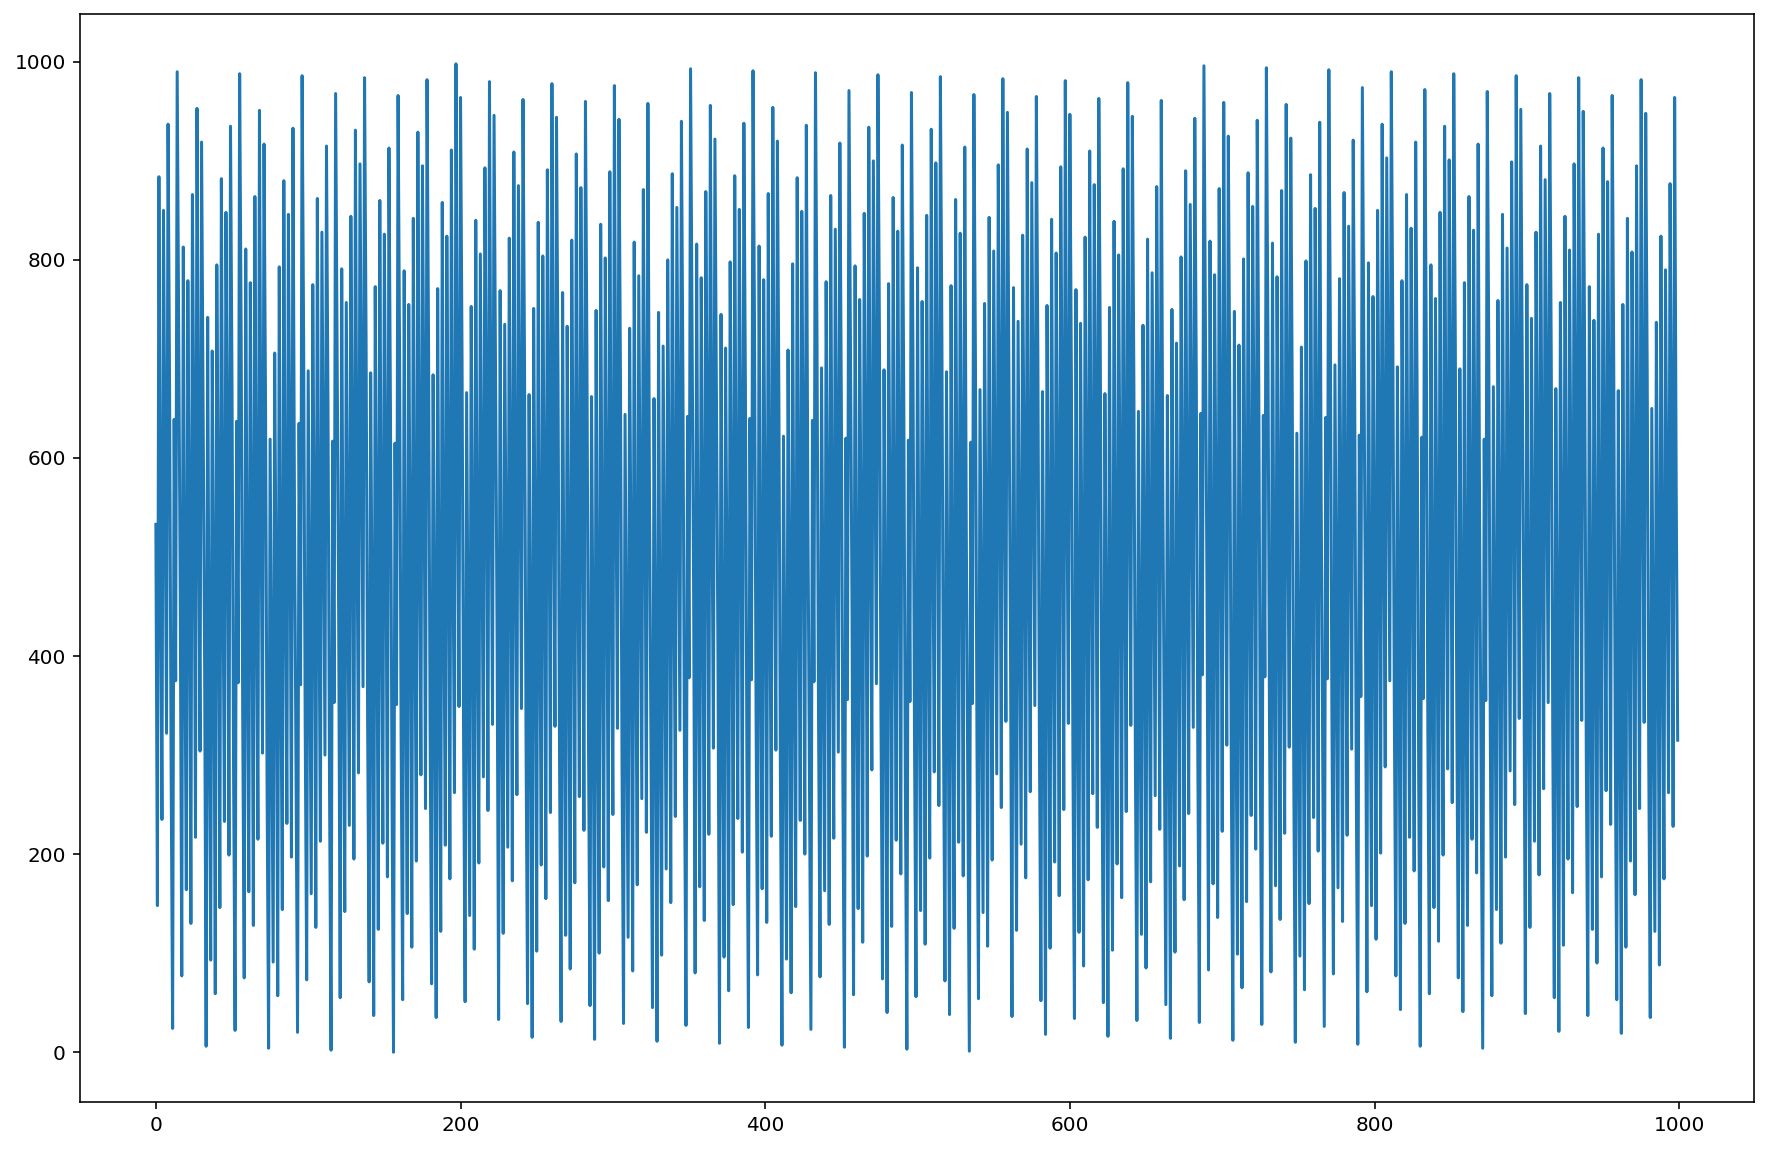

In [53]:
plt.figure(figsize=(15,10))
plt.plot(inputs, hash_results)

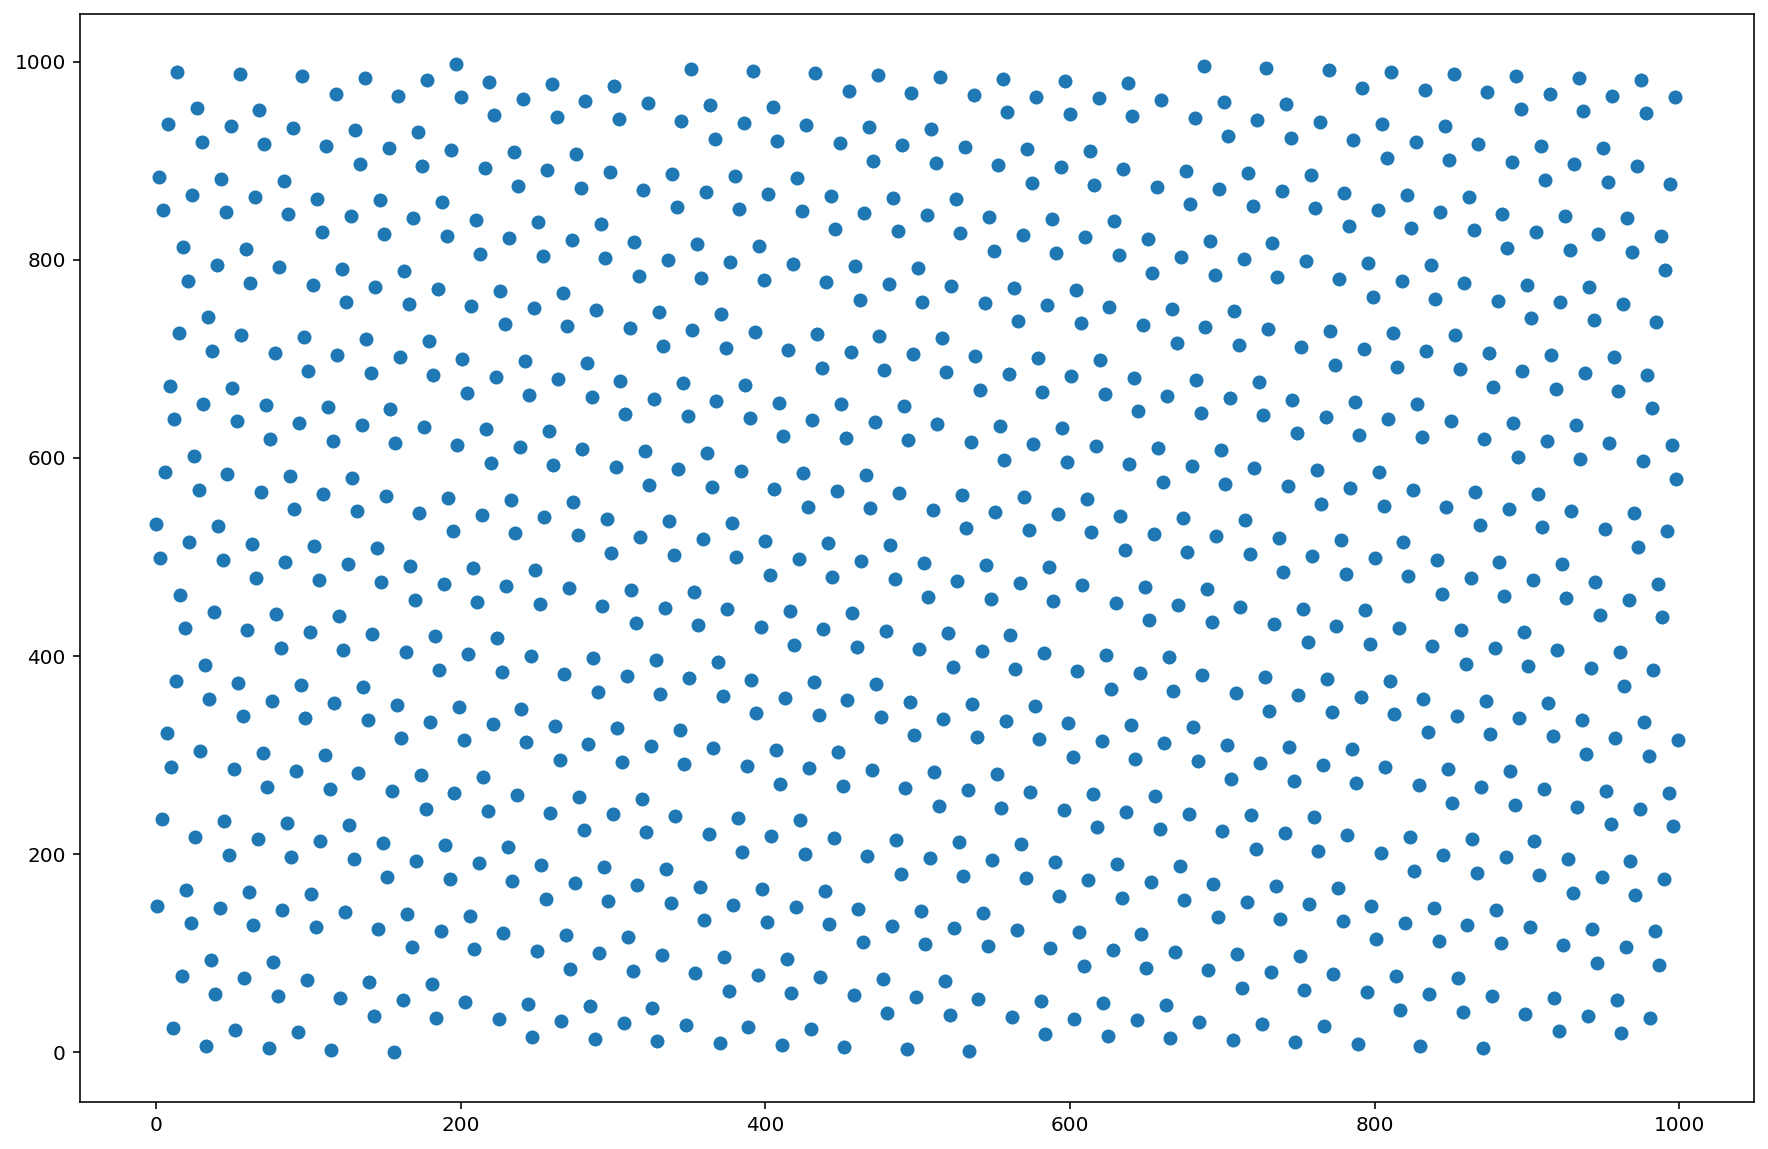

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(inputs, hash_results)

In [60]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

SyntaxError: invalid syntax (<ipython-input-60-59b4f1445eb3>, line 1)

In [63]:
averages_over_window_size_5 = moving_average(hash_results, 5)

(array([ 19.,  43.,  98., 143., 184., 181., 153., 104.,  48.,  23.]),
 array([267.4 , 313.32, 359.24, 405.16, 451.08, 497.  , 542.92, 588.84,
        634.76, 680.68, 726.6 ]),
 <a list of 10 Patch objects>)

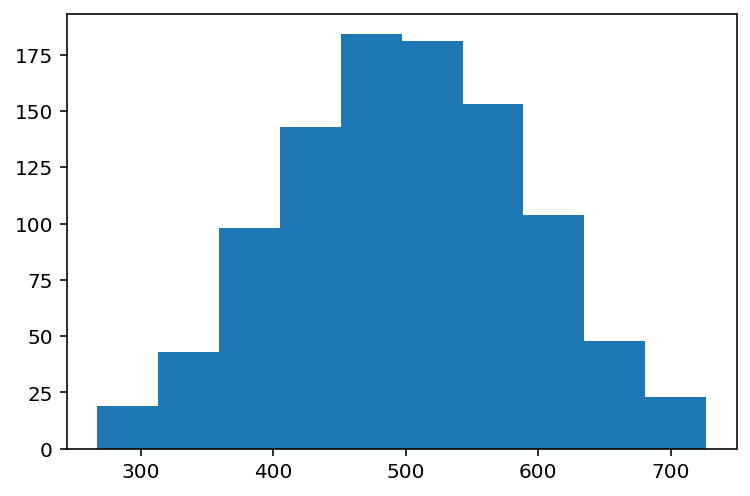

In [67]:
plt.hist(averages_over_window_size_5)

In [128]:
l = [4, 7, 9, 13, 1, 3, 7]

In [129]:
l1 = [1, 4, 7]; l2 = [3, 9, 13] 

In [130]:
def merge_sort(l):

    size = len(l)
    midway = size // 2
    first_half = l[:midway]
    second_half = l[midway:]

    if len(first_half) > 1 or len(second_half) > 1:
        sorted_first_half = merge_sort(first_half)
        sorted_second_half = merge_sort(second_half)
    else:
        sorted_first_half = first_half
        sorted_second_half = second_half
    
    sorted_l = merge(sorted_first_half, sorted_second_half)
    return sorted_l

def merge(l1, l2):
    """Merge two sorted lists."""

    i = 0 
    j = 0

    lmerged = []

    while (i <= len(l1) - 1) or (j <= len(l2) - 1):
        if i == len(l1):
            lmerged.extend(l2[j:])
            break
        if j == len(l2):
            lmerged.extend(l1[i:])
            break
        if (i < len(l1)) and (l1[i] < l2[j]):
            lmerged.append(l1[i])
            i += 1
        else:
            lmerged.append(l2[j])
            j += 1
    
    return lmerged


In [131]:
merge_sort(l)

[1, 3, 4, 7, 7, 9, 13]

In [142]:
l = [random.choice(list(range(1000))) for x in range(1000)]

In [143]:
%%time
res = sorted(l)

CPU times: user 134 µs, sys: 6 µs, total: 140 µs
Wall time: 142 µs


In [144]:
%%time
res = merge_sort(l)

CPU times: user 6.33 ms, sys: 413 µs, total: 6.74 ms
Wall time: 6.4 ms
